In [188]:
#This is the notebook for the final Capstone Project

In [187]:
!pip install graphviz

In [126]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
import pydotplus
from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
from datetime import date, datetime

In [127]:
csv_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(csv_path)
df.replace("Unknown", np.nan, inplace = True)
df["SPEEDING"].replace(np.nan, "N", inplace = True)
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.dropna(subset = ["WEATHER", "ROADCOND"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
effects = df.copy(deep = True)

df.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.



(169126, 38)

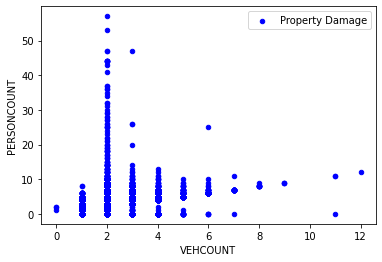

In [128]:
ax = df[df["SEVERITYCODE"] == 1].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Blue", label = "Property Damage")
plt.show()

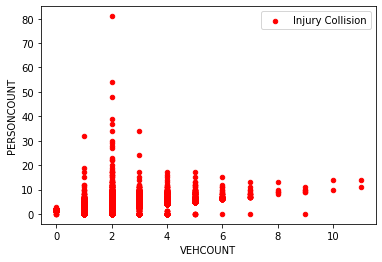

In [129]:
ax = df[df["SEVERITYCODE"] == 2].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Red", label = "Injury Collision")
plt.show()

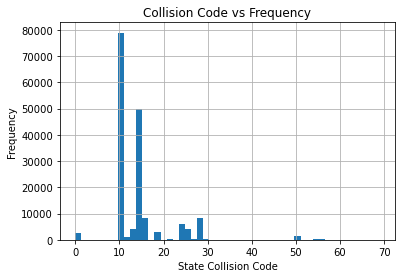

In [130]:
df.hist(column='SDOT_COLCODE', bins=50)
plt.title("Collision Code vs Frequency")
plt.xlabel("State Collision Code")
plt.ylabel("Frequency")
plt.show()

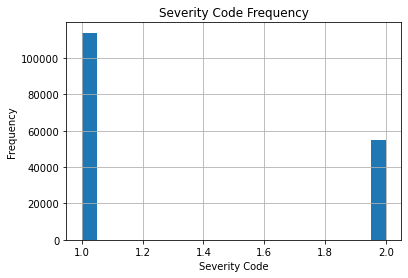

In [131]:
df.hist(column='SEVERITYCODE', bins=20)
plt.title("Severity Code Frequency")
plt.xlabel("Severity Code")
plt.ylabel("Frequency")
plt.show()

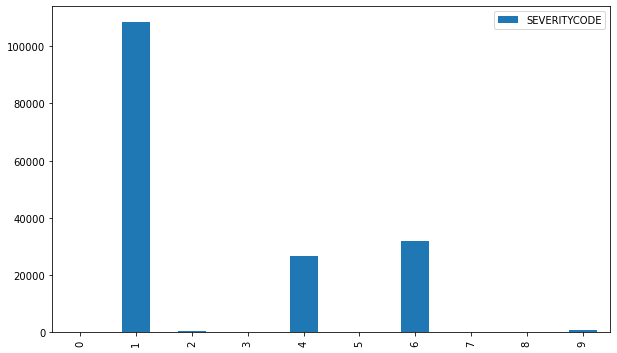

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
df_weather1=df.groupby('WEATHER').count().reset_index(drop=False)
df_weather1.shape

df_weather2=df_weather1[['WEATHER','SEVERITYCODE']]
df_weather2.head()
df_weather2.plot(kind='bar', figsize=(10, 6))
plt.show()

df_weather3=df.groupby(['WEATHER','SEVERITYCODE']).count().reset_index(drop=False)
df_weather3.shape

df_weather4=df_weather3[['WEATHER','SEVERITYCODE','Y']]
df_weather4.shape

df_weather4.rename(columns={'Y':'Count'}, inplace=True)

df_weather4.head()

df_weather4.set_index('WEATHER', inplace=True)
df_weather4.head()
df_weather4.reset_index(drop=True, inplace=True)


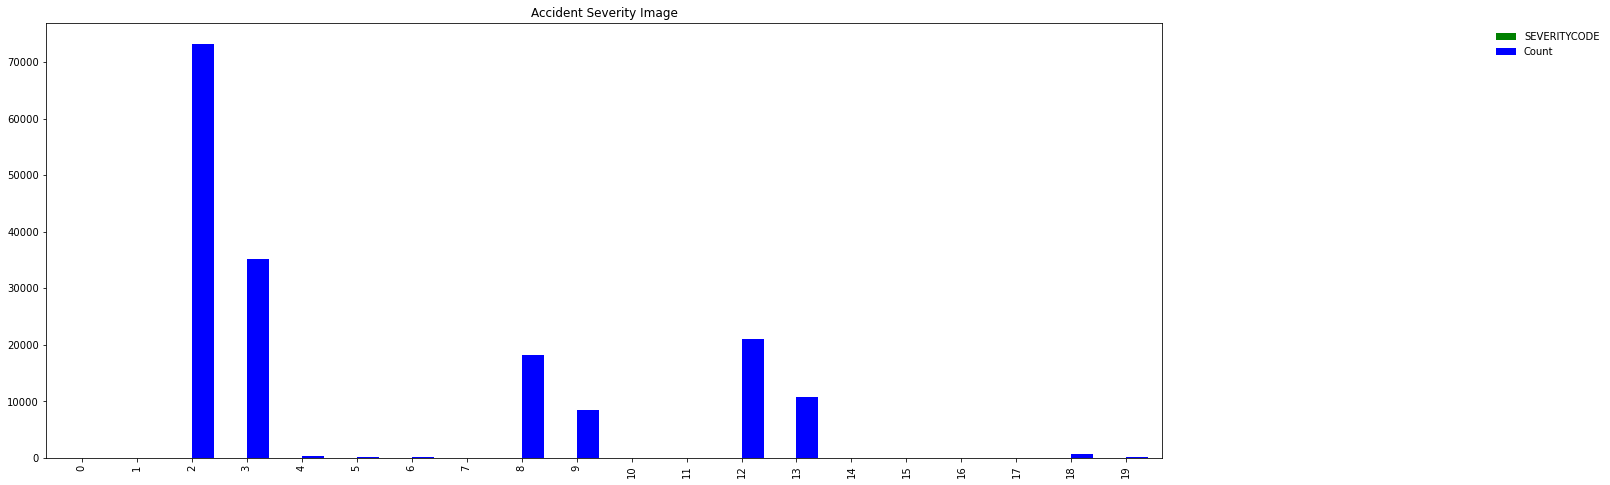

In [133]:
color_list = ['Green','Blue']
bandwidth = 0.8
df_weather4.plot(kind='bar', figsize=(20, 8), color=color_list,rot=90,width=bandwidth)
plt.title('Accident Severity Image',fontweight=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
plt.show()

In [134]:
df_weather = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["WEATHER"])
df_weather.index= ["1","2"]
df_weather

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
1,35,73229,364,189,18232,2,21121,17,85,719
2,13,35239,182,79,8560,3,10856,7,27,167


In [135]:
df_collisiontype = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["COLLISIONTYPE"])
df_collisiontype.index= ["1","2"]
df_collisiontype

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
1,20418,619,1097,8043,15745,32398,640,17972,2204,14852
2,13437,4614,852,5338,5702,2601,5693,13909,592,2383


In [136]:
df_addrtype = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["ADDRTYPE"])
df_addrtype.index= ["1","2"]
df_addrtype

ADDRTYPE,Block,Intersection
1,79445,34548
2,28231,26902


In [137]:
df_roadcond = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["ROADCOND"])
df_roadcond.index= ["1","2"]
df_roadcond

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
1,81881,843,30,65,36,737,69,30332
2,39307,262,20,39,21,160,26,15298


In [138]:
df_lightcond = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["LIGHTCOND"])
df_lightcond.index= ["1","2"]
df_lightcond

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
1,1029,774,31693,5,1551,72999,3669,124
2,310,300,14018,4,796,37521,1876,36


In [139]:
df_underinfl = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["UNDERINFL"])
df_underinfl.index= ["1","2"]
df_underinfl

UNDERINFL,0,1,N,Y
1,49311,2277,59333,3072
2,21786,1572,29889,1886


In [140]:
df_personcount=df[['PERSONCOUNT','SEVERITYCODE']]
df_personcount.head()

,PERSONCOUNT,SEVERITYCODE
0,2,2
1,2,1
2,4,1
3,3,1
4,2,2


In [141]:
df_personcount1 = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["PERSONCOUNT"])
df_personcount1.index= ["1","2"]
df_personcount1

PERSONCOUNT,0,1,2,3,4,5,6,7,8,9,...,39,41,43,44,47,48,53,54,57,81
1,3528,7603,68347,20772,7963,3503,1308,473,241,81,...,0,1,1,6,3,0,1,0,1,0
2,1722,2810,26164,12950,6064,2896,1324,619,277,125,...,1,0,0,0,0,1,0,1,0,1


In [142]:
df_vehcount = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["VEHCOUNT"])
df_vehcount.index= ["1","2"]
df_vehcount

VEHCOUNT,0,1,2,3,4,5,6,7,8,9,10,11,12
1,3,10290,94908,7121,1289,259,84,22,10,3,0,3,1
2,190,13461,34790,5293,1052,254,58,20,5,6,2,2,0


In [143]:
df_pedcount = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["PEDCOUNT"])
df_pedcount.index= ["1","2"]
df_pedcount

PEDCOUNT,0,1,2,3,4,5,6
1,113327,647,18,1,0,0,0
2,49145,5758,203,21,4,1,1


In [144]:
df_pedcylcount = pd.crosstab(index=df["SEVERITYCODE"], 
                           columns=df["PEDCYLCOUNT"])
df_pedcylcount.index= ["1","2"]
df_pedcylcount

PEDCYLCOUNT,0,1,2
1,113366,627,0
2,50459,4632,42


In [145]:
numCols= ["PERSONCOUNT", "VEHCOUNT", "PEDCOUNT", "PEDCYLCOUNT"]

In [146]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'],'Y') 
df['UNDERINFL'] = df['UNDERINFL'].replace(['0'],'N')
# Fill missing values
df["UNDERINFL"] = df["UNDERINFL"].fillna('N')
df["ROADCOND"] = df["ROADCOND"].fillna('Dry')
df["LIGHTCOND"] = df["LIGHTCOND"].fillna('Daylight')
df["ADDRTYPE"] = df["ADDRTYPE"].fillna('Block')
df=df.dropna(subset = ['COLLISIONTYPE'])
for i in numCols:
    df[i].fillna((df[i].mean()), inplace=True)
 #Remove Outliers
df= df[df.PERSONCOUNT<9]
df= df[df.VEHCOUNT<5]
df= df[df.VEHCOUNT>0]
df= df[df.PEDCOUNT<3]
df= df[df.PEDCYLCOUNT<2]

In [147]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [148]:
df['WEATHER'].value_counts()

Clear                       107482
Raining                      31725
Overcast                     26557
Snowing                        875
Fog/Smog/Smoke                 545
Other                          266
Sleet/Hail/Freezing Rain       111
Blowing Sand/Dirt               48
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [149]:
cleanup_nums = {"WEATHER":     {"Clear": 0, "Raining": 1, "Overcast": 2, "Snowing": 3, "Fog/Smog/Smoke": 4, "Other": 5, "Sleet/Hail/Freezing Rain": 6, "Blowing Sand/Dirt": 7, "Severe Crosswind": 8, "Partly Cloudy": 9}}

In [150]:
df.replace(cleanup_nums, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [151]:
cleanup_nums = {"COLLISIONTYPE":     {"Parked Car": 0, "Angles": 1, "Rear Ended": 2, "Other": 3, "Sideswipe": 4, "Left Turn": 5, "Pedestrian": 6, "Cycles": 7, "Right Turn": 8, "Head On": 9}}

In [152]:
df.replace(cleanup_nums, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [153]:
cleanup_nums = {"ADDRTYPE":     {"Block": 0, "Intersection": 1}}

In [154]:
df.replace(cleanup_nums, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,1,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,0,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,0,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,0,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,1,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [155]:
cleanup_nums = {"ROADCOND":     {"Dry": 0, "Wet": 1, "Ice": 2, "Snow/Slush": 3, "Other": 4, "Standing Water": 5, "Sand/Mud/Dirt": 6, "Oil": 7}}

In [156]:
df.replace(cleanup_nums, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,1,37475.0,...,1,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,0,NaN,...,1,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,0,NaN,...,0,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,0,NaN,...,0,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,1,34387.0,...,1,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [157]:
cleanup_nums = {"LIGHTCOND":     {"Daylight": 0, "Dark - Street Lights On": 1, "Dusk": 2, "Dawn": 3, "Dark - No Street Lights": 4, "Dark - Street Lights Off": 5, "Other": 6, "Dark - Unknown Lighting": 7}}

In [158]:
df.replace(cleanup_nums, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,1,37475.0,...,1,0,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,0,NaN,...,1,1,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,0,NaN,...,0,0,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,0,NaN,...,0,0,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,1,34387.0,...,1,0,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [159]:
cleanup_nums = {"UNDERINFL":     {"N": 0, "Y": 1}}

In [160]:
df.replace(cleanup_nums, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,1,37475.0,...,1,0,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,0,NaN,...,1,1,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,0,NaN,...,0,0,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,0,NaN,...,0,0,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,1,34387.0,...,1,0,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [161]:
df[["WEATHER", "SEVERITYCODE"]].corr()

,WEATHER,SEVERITYCODE
WEATHER,1.00000,-0.00526
SEVERITYCODE,-0.00526,1.00000


In [162]:
df[["COLLISIONTYPE", "SEVERITYCODE"]].corr()

,COLLISIONTYPE,SEVERITYCODE
COLLISIONTYPE,1.00000,0.22783
SEVERITYCODE,0.22783,1.00000


In [163]:
df[["ADDRTYPE", "SEVERITYCODE"]].corr()

,ADDRTYPE,SEVERITYCODE
ADDRTYPE,1.000000,0.181321
SEVERITYCODE,0.181321,1.000000


In [164]:
df[["ROADCOND", "SEVERITYCODE"]].corr()

,ROADCOND,SEVERITYCODE
ROADCOND,1.000000,-0.002462
SEVERITYCODE,-0.002462,1.000000


In [165]:
df[["LIGHTCOND", "SEVERITYCODE"]].corr()

,LIGHTCOND,SEVERITYCODE
LIGHTCOND,1.000000,-0.022966
SEVERITYCODE,-0.022966,1.000000


In [166]:
df[["UNDERINFL", "SEVERITYCODE"]].corr()

,UNDERINFL,SEVERITYCODE
UNDERINFL,1.000000,0.032742
SEVERITYCODE,0.032742,1.000000


In [167]:
df[["PERSONCOUNT", "SEVERITYCODE"]].corr()

,PERSONCOUNT,SEVERITYCODE
PERSONCOUNT,1.000000,0.128389
SEVERITYCODE,0.128389,1.000000


In [168]:
df[["VEHCOUNT", "SEVERITYCODE"]].corr()

,VEHCOUNT,SEVERITYCODE
VEHCOUNT,1.000000,-0.097408
SEVERITYCODE,-0.097408,1.000000


In [169]:
df[["PEDCOUNT", "SEVERITYCODE"]].corr()

,PEDCOUNT,SEVERITYCODE
PEDCOUNT,1.00000,0.24386
SEVERITYCODE,0.24386,1.00000


In [170]:
df[["PEDCYLCOUNT", "SEVERITYCODE"]].corr()

,PEDCYLCOUNT,SEVERITYCODE
PEDCYLCOUNT,1.000000,0.208777
SEVERITYCODE,0.208777,1.000000


In [171]:
X = df[['WEATHER','COLLISIONTYPE',"ADDRTYPE",'ROADCOND', 'LIGHTCOND', 'UNDERINFL','PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT']].values

In [172]:
Y=df['SEVERITYCODE'].values

In [173]:
Y[0:5]

array([2, 1, 1, 1, 2])

In [174]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[ 1.72262872, -0.66974852,  1.32194302,  1.26601428, -0.55448619,
        -0.23249784, -0.39865205,  0.07838657, -0.19831367, -0.17647252],
       [ 0.53454977,  0.72968688, -0.75646226,  1.26601428,  0.68742005,
        -0.23249784, -0.39865205,  0.07838657, -0.19831367, -0.17647252],
       [ 1.72262872, -1.13622699, -0.75646226, -0.56398297, -0.55448619,
        -0.23249784,  1.34180585,  2.01196029, -0.19831367, -0.17647252],
       [-0.65352918,  0.26320841, -0.75646226, -0.56398297, -0.55448619,
        -0.23249784,  0.4715769 ,  2.01196029, -0.19831367, -0.17647252],
       [ 0.53454977, -0.66974852,  1.32194302,  1.26601428, -0.55448619,
        -0.23249784, -0.39865205,  0.07838657, -0.19831367, -0.17647252]])

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134110, 10) (134110,)
Test set: (33528, 10) (33528,)


In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [178]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 1, 1, 1])

In [179]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7283871448810678
Test set Accuracy:  0.7108685277976616


In [180]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65828561, 0.70081723, 0.67832856, 0.71086853, 0.70457528,
       0.7124493 , 0.70278573, 0.71414937, 0.70958602])

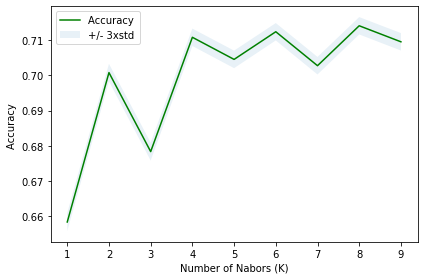

The best accuracy was with 0.7141493676926748 with k= 8


In [181]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [182]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [183]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
predTree = drugTree.predict(X_test)

In [185]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[1 2 1 1 2]


In [186]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7240515390121689
